### Reading the web page into python

In [1]:
import requests # To load the webpage

In [2]:
r = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html')

In [3]:
r

<Response [200]>

In [4]:
r.text[:500]

'<!DOCTYPE html>\n<!--[if (gt IE 9)|!(IE)]> <!--><html lang="en" class="no-js page-interactive section-opinion page-theme-standard tone-opinion page-interactive-default limit-small layout-xlarge app-interactive" itemid="https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html" itemtype="http://schema.org/NewsArticle" itemscope xmlns:og="http://opengraphprotocol.org/schema/"><!--<![endif]-->\n<!--[if IE 9]> <html lang="en" class="no-js ie9 lt-ie10 page-interactive section-opinion page'

### parsing the html using BeautifulSoup

In [5]:
from bs4 import BeautifulSoup as bs # It will display the content which are inside the tags

In [6]:
soup = bs(r.text, 'html.parser') # to Parsing the content using html tags

In [ ]:
print(soup.prettify())

### Collecting all the records

In [8]:
result = soup.find_all('span', attrs={'class':'short-desc'})

In [9]:
len(result)

180

In [ ]:
print(result)

In [11]:
result[0]

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [12]:
result[1]

<span class="short-desc"><strong>Jan. 21 </strong>“A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.” <span class="short-truth"><a href="http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/" target="_blank">(Trump was on the cover 11 times and Nixon appeared 55 times.)</a></span></span>

In [13]:
result[-1]

<span class="short-desc"><strong>Nov. 11 </strong>“I'd rather have him  – you know, work with him on the Ukraine than standing and arguing about whether or not  – because that whole thing was set up by the Democrats.” <span class="short-truth"><a href="https://www.nytimes.com/interactive/2017/12/10/us/politics/trump-and-russia.html" target="_blank">(There is no evidence that Democrats "set up" Russian interference in the election.)</a></span></span>

### Extracting the Dates 

In [14]:
result0 = result[0]

In [15]:
result0

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [16]:
result0.find('strong')

<strong>Jan. 21 </strong>

In [17]:
result0.find('strong').text # or get_text 

'Jan. 21\xa0'

In [18]:
result0.find('strong').text[0:7]

'Jan. 21'

In [19]:
result0.find('strong').text[0:7] + ', 2017'

'Jan. 21, 2017'

### Extracting the lie

In [20]:
result0

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [21]:
result0.contents

[<strong>Jan. 21 </strong>,
 "“I wasn't a fan of Iraq. I didn't want to go into Iraq.” ",
 <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span>]

In [22]:
result0.contents[1]

"“I wasn't a fan of Iraq. I didn't want to go into Iraq.” "

In [23]:
result0.contents[1][1:-2]

"I wasn't a fan of Iraq. I didn't want to go into Iraq."

### Extracting the explanation

In [24]:
result0

<span class="short-desc"><strong>Jan. 21 </strong>“I wasn't a fan of Iraq. I didn't want to go into Iraq.” <span class="short-truth"><a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a></span></span>

In [25]:
result0.find('a')

<a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a>

In [26]:
result0.find('a').text[1:-1]

'He was for an invasion before he was against it.'

### Extracting the Links

In [27]:
result0.find('a')

<a href="https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the" target="_blank">(He was for an invasion before he was against it.)</a>

In [28]:
result0.find('a')['href']

'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'

## Notes for Beautiful Soup Methods & Attributes

**You can apply these two methods to either initialse soup object or a tag object**

- find() :- searches for the first matching tag and returns a tag object
- find_all() :- searches for all the matching tags and returns a resultant object as a list

**You can extract information from a tag object using these two attributes**

- text :- extracts the text of a tag object and returns a string
- contents :- extracts the children of a tag and returns  a list of tags and strings     

### Iterating

In [29]:
record = []

for i in result:
    date = i.find('strong').text[0:7] + ', 2017'
    lie = i.contents[1][1:-2]
    exp = i.find('a').text[1:-1]
    link = i.find('a')['href']
    
    record.append((date,lie,exp,link))

In [195]:
record[:3]

[('Jan. 21, 2017',
  "I wasn't a fan of Iraq. I didn't want to go into Iraq.",
  'He was for an invasion before he was against it.',
  'https://www.buzzfeed.com/andrewkaczynski/in-2002-donald-trump-said-he-supported-invading-iraq-on-the'),
 ('Jan. 21, 2017',
  'A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.',
  'Trump was on the cover 11 times and Nixon appeared 55 times.',
  'http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/'),
 ('Jan. 23, 2017',
  'Between 3 million and 5 million illegal votes caused me to lose the popular vote.',
  "There's no evidence of illegal voting.",
  'https://www.nytimes.com/2017/01/23/us/politics/donald-trump-congress-democrats.html')]

### Applying Tabular Data Structure

In [31]:
import pandas as pd

In [32]:
ny = pd.DataFrame(record, columns=['date','Trump lie','Explanation','Links']) 

In [33]:
ny.head()

,date,Trump lie,Explanation,Links
0,"Jan. 21, 2017",I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,"Jan. 21, 2017",A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,"Jan. 23, 2017",Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,"Jan. 25, 2017","Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,"Jan. 25, 2017",Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [47]:
 ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         180 non-null    datetime64[ns]
 1   Trump lie    180 non-null    object        
 2   Explanation  180 non-null    object        
 3   Links        180 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.8+ KB


In [48]:
ny['date'] = pd.to_datetime(ny['date'])

In [49]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         180 non-null    datetime64[ns]
 1   Trump lie    180 non-null    object        
 2   Explanation  180 non-null    object        
 3   Links        180 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.8+ KB


### Exporting the Dataset into csv file

In [50]:
ny.to_csv('Trump Lie.csv')

In [188]:
df = pd.read_csv('Trump Lie.csv')
df.head()

,Unnamed: 0,date,Trump lie,Explanation,Links
0,0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [189]:
x = df.date.value_counts().sum()
x

180

In [190]:
# Start index from 1 in DataFrame
df.index += 1

In [191]:
df.head()

,Unnamed: 0,date,Trump lie,Explanation,Links
1,0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
2,1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
3,2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
4,3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
5,4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [192]:
# Deleting unwanted columne
df.drop(columns=["Unnamed: 0"],inplace=True)

In [193]:
df.head()

,date,Trump lie,Explanation,Links
1,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
2,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
3,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
4,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
5,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

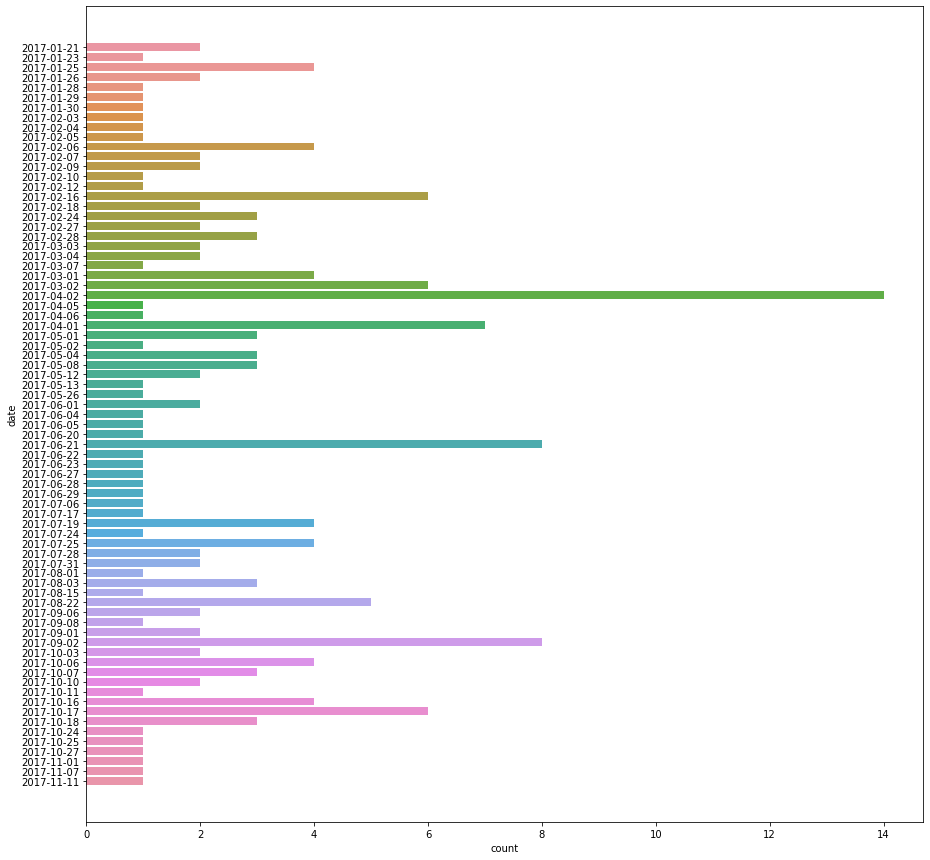

In [56]:
plt.figure(figsize=(15,15))
sns.countplot(data=df, y = 'date')
plt.plot()

- As per the graph President Trump has most lied recorded on the date 2017-04-02 and 2017-06-21

In [173]:
# President Trump most lies in a  single month of april
df[df.date.str.contains('2017-04-02')]

,date,Trump lie,Explanation,Links
57,2017-04-02,And I was totally opposed to the war in the Mi...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
58,2017-04-02,"Now, my last tweet — you know, the one that yo...",There is still no evidence.,https://www.nytimes.com/2017/03/04/us/politics...
68,2017-04-02,On 90 planes I saved $725 million. It's actual...,Much of the price cuts were already projected.,https://www.washingtonpost.com/news/fact-check...
69,2017-04-02,When WikiLeaks came out ... never heard of Wik...,He criticized it as early as 2010.,https://www.washingtonpost.com/news/fact-check...
70,2017-04-02,I want to help our miners while the Democrats ...,The bill to extend health benefits for certain...,http://www.pbs.org/newshour/rundown/retired-co...
71,2017-04-02,The trade deficit with Mexico is close to $70 ...,"The U.S. had an $8.1 billion trade surplus, no...",http://www.factcheck.org/2017/05/trumps-100-da...
72,2017-04-02,She's running against someone who's going to r...,Those are not Jon Ossoff's positions.,http://www.mdjonline.com/opinion/jon-ossoff-vo...
73,2017-04-02,The F-35 fighter jet program — it was way over...,Much of the price cuts were planned before Trump.,https://www.washingtonpost.com/news/fact-check...
74,2017-04-02,"As you know, I've been a big critic of China, ...",China stopped years ago.,https://www.nytimes.com/2017/04/07/world/asia/...
75,2017-04-02,I've already saved more than $725 million on a...,Much of the price cuts were planned before Trump.,https://www.washingtonpost.com/news/fact-check...


In [57]:
df.describe()

,Unnamed: 0
count,180.000000
mean,89.500000
std,52.105662
min,0.000000
25%,44.750000
50%,89.500000
75%,134.250000
max,179.000000


In [58]:
df.head(2)

,Unnamed: 0,date,Trump lie,Explanation,Links
1,0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
2,1,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...


In [77]:
df.Links.tail()

176    https://www.bea.gov/newsreleases/international...
177    https://www.opensecrets.org/donor-lookup/resul...
178    http://www.politifact.com/truth-o-meter/statem...
179    http://www.politifact.com/truth-o-meter/statem...
180    https://www.nytimes.com/interactive/2017/12/10...
Name: Links, dtype: object

In [73]:
# All the nytimes links
df[df["Links"].str.contains('nytimes')]

,Unnamed: 0,date,Trump lie,Explanation,Links
3,2,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
4,3,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
5,4,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...
6,5,2017-01-25,You had millions of people that now aren't ins...,"The real number is less than 1 million, accord...",https://www.nytimes.com/2017/03/13/us/politics...
8,7,2017-01-26,We've taken in tens of thousands of people. We...,Vetting lasts up to two years.,https://www.nytimes.com/interactive/2017/01/29...
10,9,2017-01-28,The coverage about me in the @nytimes and the ...,It never apologized.,https://www.nytimes.com/2016/11/13/us/election...
12,11,2017-01-30,"Only 109 people out of 325,000 were detained a...",At least 746 people were detained and processe...,http://markets.on.nytimes.com/research/stocks/...
13,12,2017-02-03,"Professional anarchists, thugs and paid protes...",There is no evidence of paid protesters.,https://www.nytimes.com/2017/01/28/nyregion/jf...
14,13,2017-02-04,After being forced to apologize for its bad an...,It never apologized.,https://www.nytimes.com/2016/11/13/us/election...
17,16,2017-02-06,It's gotten to a point where it is not even be...,"Terrorism has been reported on, often in detail.",https://www.nytimes.com/2017/02/07/us/politics...


In [79]:
# Iraqs lie and Explantion
df[df["Trump lie"].str.contains('Iraq')]

,Unnamed: 0,date,Trump lie,Explanation,Links
1,0,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
19,18,2017-02-06,And the previous administration allowed it to ...,The group’s origins date to 2004.,https://www.nytimes.com/2015/11/19/world/middl...


In [117]:
print("2017-01-21:--",df.iloc[0,2])
print("2017-02-06:--",df.iloc[18,2])

2017-01-21:-- I wasn't a fan of Iraq. I didn't want to go into Iraq.
2017-02-06:-- And the previous administration allowed it to happen because we shouldn't have been in Iraq, but we shouldn't have gotten out the way we got out. It created a vacuum, ISIS was formed.


In [88]:
# This many times President Trump has also lied about President Obama too
df[df["Trump lie"].str.contains('President')]

,Unnamed: 0,date,Trump lie,Explanation,Links
7,6,2017-01-25,"So, look, when President Obama was there two w...",There were no gun homicide victims in Chicago ...,https://www.dnainfo.com/chicago/2017-chicago-m...
44,43,2017-03-04,How low has President Obama gone to tap my pho...,There's no evidence of a wiretap.,https://www.nytimes.com/2017/03/04/us/politics...
126,125,2017-07-31,And even the President of Mexico called me – ...,Mexico's president says he didn't call Trump.,http://www.cnn.com/2017/08/02/politics/trump-p...
164,163,2017-10-16,If you look at President Obama and other presi...,They did call families of soldiers killed in a...,https://www.nytimes.com/2017/10/16/us/politics...
171,170,2017-10-17,I wish President Obama didn't get out the way ...,The group’s origins date to 2004.,https://www.nytimes.com/2015/11/19/world/middl...


In [107]:
print("2017-01-25:-- ",df.iloc[6,2])
print()
print("2017-03-04:--",df.iloc[43,2])
print()
print("2017-07-31:--",df.iloc[125,2])
print()
print("2017-10-16:--",df.iloc[163,2])
print()
print("2017-10-17:--",df.iloc[170,2])

2017-01-25:--  So, look, when President Obama was there two weeks ago making a speech, very nice speech. Two people were shot and killed during his speech. You can't have that.

2017-03-04:-- How low has President Obama gone to tap my phones during the very sacred election process. This is Nixon/Watergate. Bad (or sick) guy!

2017-07-31:-- And even the President of Mexico called me  – they said their southern border, very few people are coming because they know they’re not going to get through our border, which is the ultimate compliment.

2017-10-16:-- If you look at President Obama and other presidents, most of them didn’t make calls.

2017-10-17:-- I wish President Obama didn't get out the way he got out. Because that left a vacuum and ISIS was formed.


In [180]:
# Sorting lies by date
df.sort_values('date',ascending=True).head()

,date,Trump lie,Explanation,Links
1,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
2,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
3,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
4,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
5,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [181]:
df.head()

,date,Trump lie,Explanation,Links
1,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
2,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
3,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
4,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
5,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


In [182]:
# All the 2017-january month lies
df[df.date.str.contains('2017-01')]

,date,Trump lie,Explanation,Links
1,2017-01-21,I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
2,2017-01-21,A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
3,2017-01-23,Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
4,2017-01-25,"Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
5,2017-01-25,Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...
6,2017-01-25,You had millions of people that now aren't ins...,"The real number is less than 1 million, accord...",https://www.nytimes.com/2017/03/13/us/politics...
7,2017-01-25,"So, look, when President Obama was there two w...",There were no gun homicide victims in Chicago ...,https://www.dnainfo.com/chicago/2017-chicago-m...
8,2017-01-26,We've taken in tens of thousands of people. We...,Vetting lasts up to two years.,https://www.nytimes.com/interactive/2017/01/29...
9,2017-01-26,I cut off hundreds of millions of dollars off ...,Most of the cuts were already planned.,https://www.washingtonpost.com/news/fact-check...
10,2017-01-28,The coverage about me in the @nytimes and the ...,It never apologized.,https://www.nytimes.com/2016/11/13/us/election...


In [183]:
# Trump lie on Gary Cohn(Vice Chairman of IBM)
df[df["Trump lie"].str.contains('Gary Cohn')]

,date,Trump lie,Explanation,Links
104,2017-06-21,Gary Cohn just paid $200 million in tax in ord...,Cohn sold Goldman Sachs stock worth $220 million.,https://www.nytimes.com/2017/06/22/us/politics...


In [184]:
df.iloc[103,1]

'Gary Cohn just paid $200 million in tax in order to take this job, by the way.'

In [185]:
# Trump lie on india , china about the aggrement of coal plants
df[df["Trump lie"].str.contains('India')]

,date,Trump lie,Explanation,Links
94,2017-06-01,China will be allowed to build hundreds of add...,The agreement doesn’t allow or disallow buildi...,https://www.washingtonpost.com/news/the-fix/wp...


In [186]:
df.iloc[93,1]

'China will be allowed to build hundreds of additional coal plants. So, we can’t build the plants, but they can, according to this agreement. India will be allowed to double its coal production by 2020.'

### Thankyou